In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()



Saving zillow.csv to zillow (6).csv


In [ ]:
housing = pd.read_csv('zillow.csv')
housing.head()
#displaying first 5 rows


,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0


In [ ]:
# Data Cleaning and Feature Engineering
# Step 1: Handling Missing Values
# - Drop rows with missing 'ListedPrice' as this is the target variable.
# - For other missing values, we will consider imputation based on median for numeric features.
housing = housing.dropna(subset=['ListedPrice'])

# Filling missing numeric columns with median values (simplified)
numeric_cols = housing.select_dtypes(include=['float64', 'int64']).columns
housing[numeric_cols] = housing[numeric_cols].fillna(housing[numeric_cols].median())


# One-Hot Encoding for categorical features if they exist
categorical_cols = ['State', 'City']
existing_categorical_cols = [col for col in categorical_cols if col in housing.columns]
housing = pd.get_dummies(housing, columns=existing_categorical_cols, drop_first=True)

# Dropping 'Street' as it might not add predictive power and could increase dimensionality unnecessarily
if 'Street' in housing.columns:
    housing.drop(columns=['Street'], inplace=True)
    # Print the cleaned dataset
print("Data after cleaning:")
print(housing.head())


Data after cleaning:
   Zipcode  Bedroom  Bathroom    Area        PPSq   LotArea  MarketEstimate  \
0  36571.0      4.0       2.0  1614.0  148.636927  0.380500        240600.0   
1  36567.0      3.0       2.0  1800.0  144.388889  3.200000        341700.0   
2  36542.0      2.0       2.0  1250.0  274.000000  0.299449        341700.0   
3  35043.0      3.0       3.0  2224.0  150.629496  0.260000        336200.0   
4  35811.0      3.0       2.0  1225.0  204.081633  0.299449        222700.0   

   RentEstimate   Latitude  Longitude  ...  City_Zebulon  City_Zeeland  \
0        1599.0  30.819534 -88.095960  ...         False         False   
1        2149.0  30.590004 -87.580376  ...         False         False   
2        2149.0  30.284956 -87.747920  ...         False         False   
3        1932.0  33.357986 -86.608700  ...         False         False   
4        1679.0  34.775517 -86.440700  ...         False         False   

   City_Zephyr Cove  City_Zephyrhills  City_Zillah  City_Zi

In [ ]:

# Step 2: Splitting the data into features and target variable
X = housing.drop(columns=['ListedPrice'])
y = housing['ListedPrice']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error (MSE): 392728532960.55475
Mean Absolute Error (MAE): 30082.75845933436
R^2 Score: 0.8708898484542028

Feature Importance:
                 Feature  Importance
4                   PPSq    0.428341
3                   Area    0.411154
6         MarketEstimate    0.055101
2               Bathroom    0.028429
7           RentEstimate    0.021338
...                  ...         ...
4548     City_Silverdale    0.000000
2836         City_Lowman    0.000000
2822      City_Los lunas    0.000000
1936  City_Grand Prairie    0.000000
2287     City_Hueysville    0.000000

[5538 rows x 2 columns]


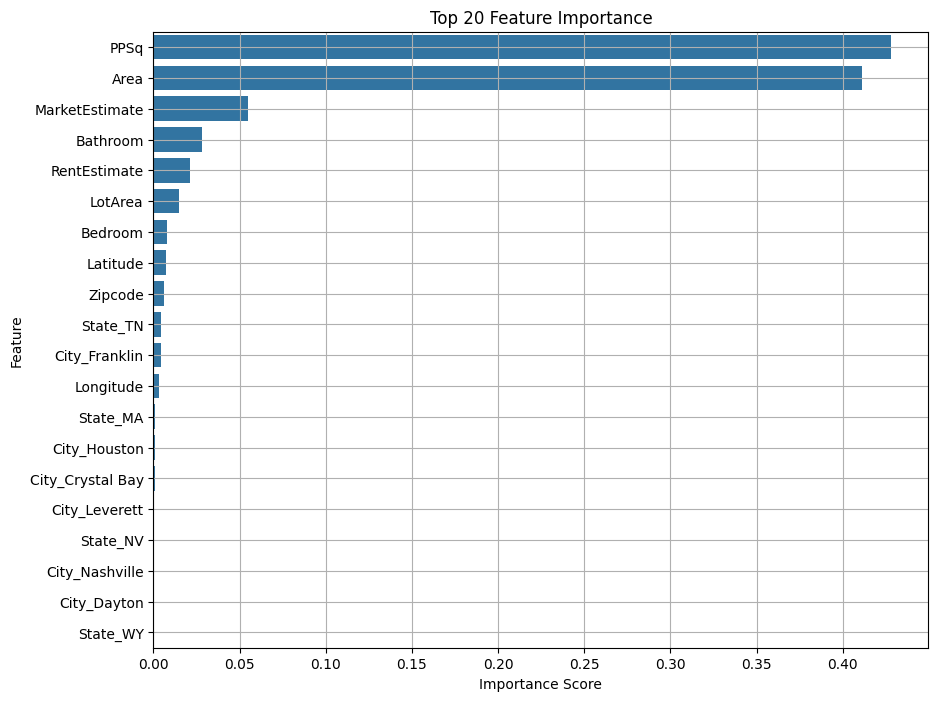

In [ ]:

# Step 3: Building the pipeline for feature scaling and model training
# Feature Scaling + Model (Random Forest Regressor for advanced modeling)
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))  # Using Random Forest
])

# Training the model
model_pipeline.fit(X_train, y_train)

# Evaluating the model
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Feature Importance
# Calculate and display feature importance scores from the Random Forest model.
# This helps understand which features are most influential in predicting home prices.
feature_importances = model_pipeline.named_steps['regressor'].feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)
#  Visualization: Top 20 Feature Importances
top_features = importance_df.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

##### **Mean Squared Error (MSE)** represents the average squared difference between the predicted and actual values. The value of **392,728,532,960.55** indicates the model's prediction errors are relatively high when squared, highlighting the presence of some large outliers.
##### **Mean Absolute Error (MAE)** measures the average magnitude of the prediction errors without considering their direction. The value of **30,082.76** shows that, on average, the model's predictions deviate by about $30,000 from the actual house prices.
##### **R^2 Score** represents the proportion of variance in the target variable that is explained by the model. With an R^2 of **0.87**, the model explains approximately 87% of the variance in house prices, which indicates a reasonably strong predictive performance.

The **feature importance plot** highlights that PPSq (Price per Square Foot), Area, and Market Estimate are the most significant features for predicting house prices, which aligns with their intuitive impact on property value. Features like specific cities and states have low importance, suggesting they may not add significant predictive value individually. This insight can guide feature reduction and further feature engineering, such as aggregating locations into broader categories to improve model performance.

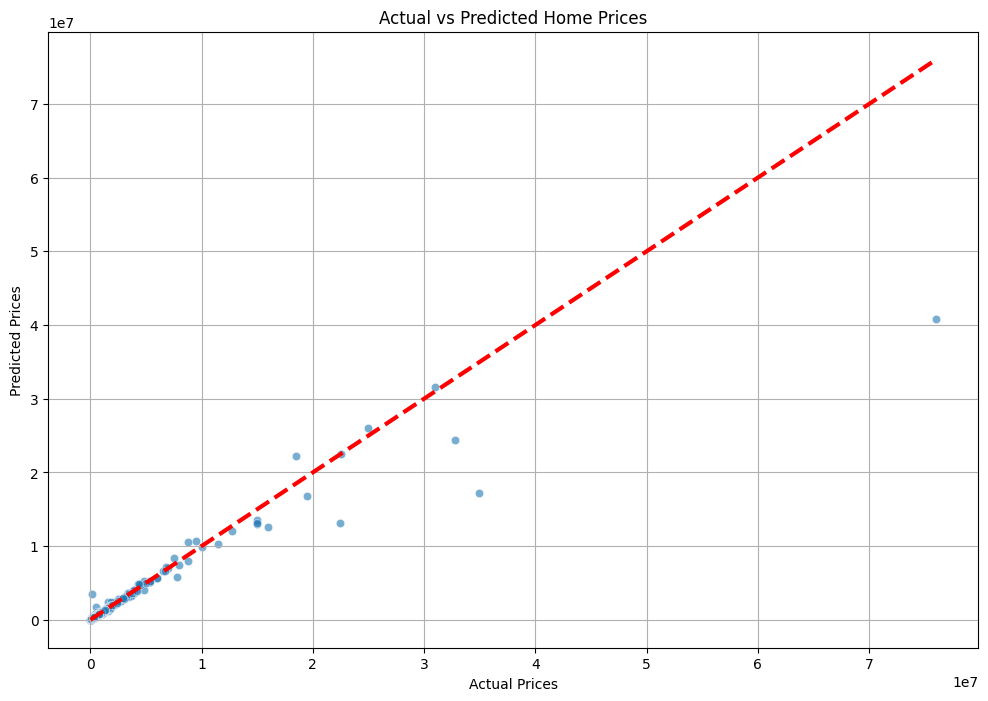

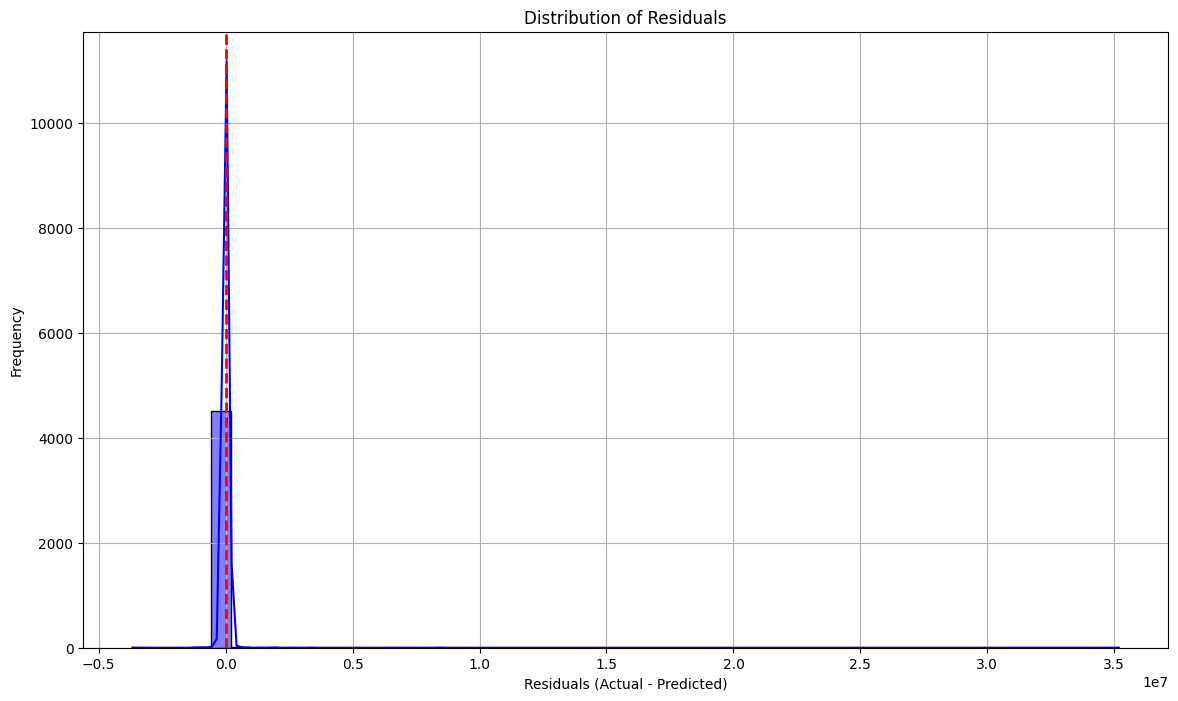

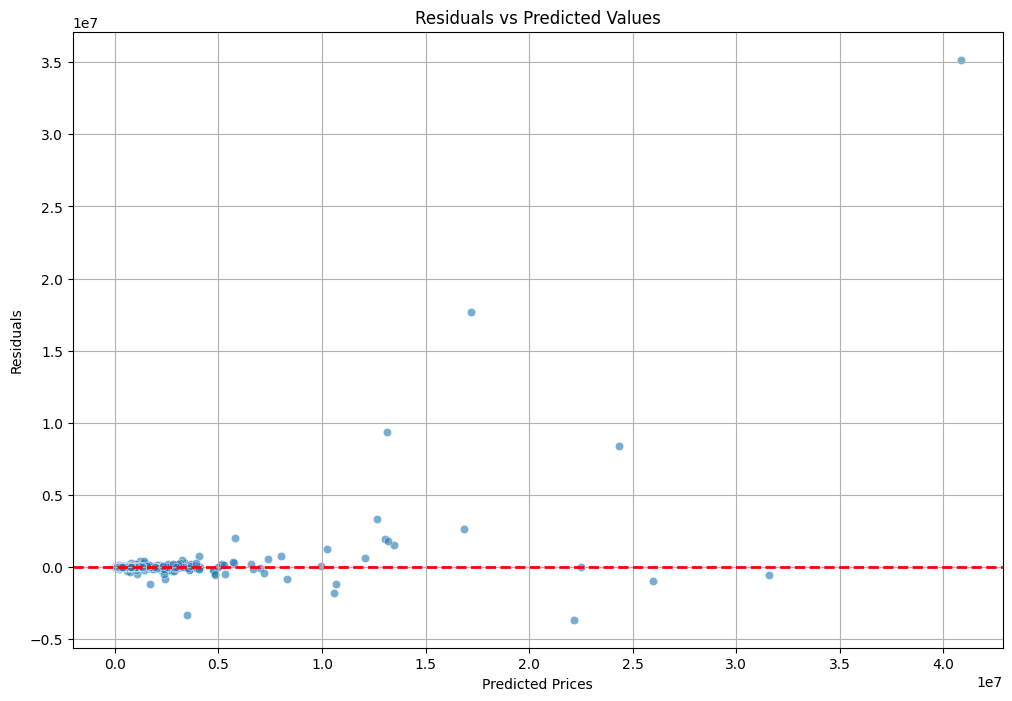

In [ ]:
# Visualizing Predictions vs. Actual
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices')
plt.grid(True)
plt.show()
# Residual Plot to further evaluate model performance
plt.figure(figsize=(14, 8))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=50, color='blue')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()
# Residuals vs. Predicted Values Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

## Summary of Graph Interpretations

##### **Actual vs Predicted Prices Plot**: Compares the actual house prices to the predicted prices. Points close to the red dashed line indicate good model predictions. The plot shows that most predictions are relatively accurate, though there are some deviations, especially for higher price values.
##### **Residual Distribution Plot**: Displays the distribution of residuals (differences between actual and predicted values). The residuals are tightly centered around zero, suggesting that the model's errors are balanced and that predictions are generally unbiased.
##### **Residuals vs Predicted Values Plot**: Shows the residuals relative to the predicted values. Ideally, residuals should be randomly distributed around zero. This plot helps identify patterns or biases in the model's predictions. The current plot indicates that the model performs well for most price ranges, though it may struggle with some high-value properties.


## Conclusion
##### The house price prediction model performs reasonably well, accurately predicting house prices for the majority of data points. Key features driving predictions include property size, price per square foot, and market estimates. The visual analysis supports the model's overall accuracy, though outliers and higher price ranges suggest the need for further tuning and feature enhancements.
